# Início da Imersão - Aula 02

- Local da base de dados: https://github.com/alura-cursos/imersaodados3/
- Descrição da base de dados:
  - Cada linha representa um tratamento (Culturas de células). Cada tratamento é submetido a experimentos.


## Integração com o Gemini da Google
- Irei utilizar o conhecimento que adquiri durante a Imersão de IA que realizei para potencializar meus estudos nesse outro notebook

In [1]:
#Instalando o SDK do Google
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 1.1 MB/s eta 0:00:00


In [2]:
#Configurações iniciais
import google.generativeai as genai

# Adicionando a minha API Key do Google e configurando ela
GOOGLE_API_KEY=""
genai.configure(api_key=GOOGLE_API_KEY)

# Definindo configurações da geração dos dados
generation_config = {
  "candidate_count": 1,
  "temperature": 0.5,
}

# Definindo configurações de segurança
safety_settings={
    'HATE': 'BLOCK_NONE',
    'HARASSMENT': 'BLOCK_NONE',
    'SEXUAL' : 'BLOCK_NONE',
    'DANGEROUS' : 'BLOCK_NONE'
    }

# Definindo o modelo que será utilizado
model = genai.GenerativeModel(model_name='gemini-1.0-pro',
                                  generation_config=generation_config,
                                  safety_settings=safety_settings,)

## Importações

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("---------- Importações realizados com sucesso ----------")

---------- Importações realizados com sucesso ----------


## Código

### Inicinado consumo da base de dados

In [4]:
url_dados = "https://github.com/alura-cursos/imersaodados3/raw/main/dados/dados_experimentos.zip?raw=true"

df_dados = pd.read_csv(url_dados, compression = "zip")

In [5]:
df_dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


### Modificando a base de dados

In [18]:
df_dados.rename(columns = {"droga": "composto"}, inplace = True)
df_dados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


### Mexendo nas colunas g

In [78]:
valores_distintos = len(df_dados["g0"].unique())
print(f"A coluna g0 tem {valores_distintos} valores únicos")

maior_val = df_dados["g0"].max()
print(f"O maior valor da coluna g0 é {maior_val}")

menor_val = df_dados["g0"].min()
print(f"O menor valor da coluna g0 é {menor_val}")

A coluna g0 tem 14367 valores únicos
O maior valor da coluna g0 é 10.0
O menor valor da coluna g0 é -5.513


- Pegando da coluna g0 até a gN

In [87]:
# Estamos pegando todas as linhas das colunas g0 até gN e aplicando o describe para recebermos informações de média, valor min, valor max, etc
# Temos esse ":" que tem a função de pegar todas as linhas, se quiséssemos pegar alguma linha específica era só passar 0:1 por exemplo
df_dados.loc[:, "g0":"g771"].describe()

,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,g762,g763,g764,g765,g766,g767,g768,g769,g770,g771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,...,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,...,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,...,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,...,-0.433875,-0.502250,-0.537075,-0.508775,-0.606175,-0.506200,-0.353100,-0.544600,-0.554400,-0.523800
50%,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,0.160450,...,0.059600,-0.005900,-0.013600,-0.027700,-0.011850,0.009900,0.005400,0.000600,0.028700,-0.006500
75%,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,0.697775,...,0.648500,0.492150,0.522500,0.457000,0.483000,0.511175,0.409075,0.498500,0.496400,0.536950
max,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,6.433000,...,10.000000,9.552000,10.000000,8.346000,5.444000,6.317000,10.000000,5.911000,10.000000,10.000000


### Gráficos

#### Gráfico com o 5 compostos mais usados

In [45]:
# Buscando os 5 compostos mais presentes
print(df_dados["composto"].value_counts()[0:5])

cod_compostos = df_dados["composto"].value_counts().index[0:5]

print(cod_compostos)

# Bsucando dentro do DF na coluna compostos, todas as linhas que os compostos tem os 5 mais presentes
df_dados.query("composto in @cod_compostos")

composto
cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
Name: count, dtype: int64
['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee']


,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,...,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,...,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,...,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,...,1.2470,0.9569,-0.2065,-0.4918,0.7863,0.0504,0.8813,0.7757,-0.5272,0.7082
23802,id_fff3976bd,com_droga,24,D1,87d714366,3.2890,2.1270,0.9770,2.0490,2.3170,...,-8.6300,-8.1490,-6.2900,-8.0970,-8.7330,-2.3780,-8.4480,-4.4550,-5.7930,-3.7000
23805,id_fff6df1c5,com_droga,48,D2,5628cb3ee,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,...,0.2865,0.5974,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808


<ipython-input-58-03aa74634c12>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_dados.query("composto in @cod_compostos"), x="composto", palette=sns.color_palette("Set2"), order=cod_compostos)
<ipython-input-58-03aa74634c12>:5: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.countplot(data=df_dados.query("composto in @cod_compostos"), x="composto", palette=sns.color_palette("Set2"), order=cod_compostos)
<ipython-input-58-03aa74634c12>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


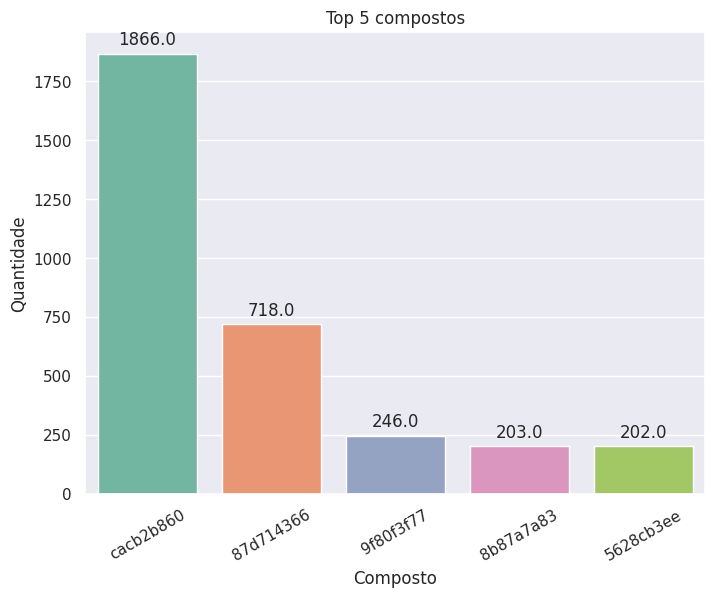

In [58]:
sns.set()

plt.figure(figsize=(8, 6))

ax = sns.countplot(data=df_dados.query("composto in @cod_compostos"), x="composto", palette=sns.color_palette("Set2"), order=cod_compostos)

# Definindo um título
ax.set_title("Top 5 compostos")

# Definindo os labels
ax.set_xlabel("Composto")
ax.set_ylabel("Quantidade")

# Definindo as rotação dos labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

# Adicionando os valores em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

#### Gráfico comparando 2 genes

Text(0.5, 1.0, 'g1')

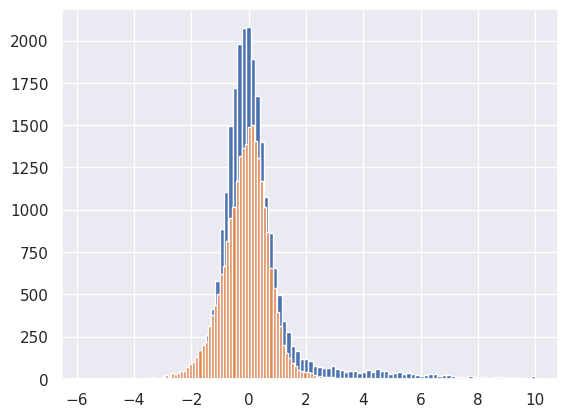

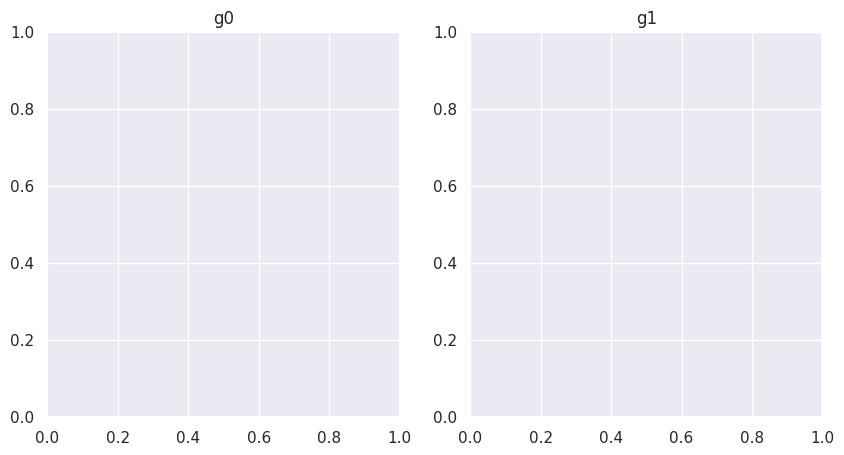

In [71]:
# bins é o número de barras no histograma.
# Escolher um número maior de bins dividirá os dados em intervalos menores,
# resultando em uma visualização mais detalhada e informativa.
# No entanto, escolher muitos bins pode fazer o histograma parecer desordenado e difícil de interpretar.
ax1 = df_dados["g0"].hist(bins=100)
ax2 = df_dados["g1"].hist(bins=100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.set_title("g0")
ax2.set_title("g1")

#### Gráfico de histograma da média do genes

        count      mean       std     min       25%      50%       75%     max
g0    23814.0  0.248366  1.393399  -5.513 -0.473075 -0.00885  0.525700  10.000
g1    23814.0 -0.095684  0.812363  -5.737 -0.562200 -0.04660  0.403075   5.039
g2    23814.0  0.152253  1.035731  -9.104 -0.437750  0.07520  0.663925   8.257
g3    23814.0  0.081971  0.950012  -5.998 -0.429575  0.00805  0.463400  10.000
g4    23814.0  0.057347  1.032091  -6.369 -0.470925 -0.02690  0.465375  10.000
...       ...       ...       ...     ...       ...      ...       ...     ...
g767  23814.0 -0.076251  1.115477 -10.000 -0.506200  0.00990  0.511175   6.317
g768  23814.0  0.134162  0.951264  -4.269 -0.353100  0.00540  0.409075  10.000
g769  23814.0 -0.128018  1.230636 -10.000 -0.544600  0.00060  0.498500   5.911
g770  23814.0 -0.219210  1.326193 -10.000 -0.554400  0.02870  0.496400  10.000
g771  23814.0  0.101524  1.417674 -10.000 -0.523800 -0.00650  0.536950  10.000

[772 rows x 8 columns]


<Axes: >

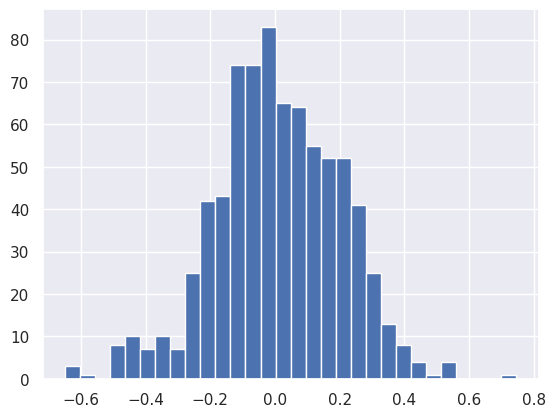

In [100]:
# Transpondo o DF
print(df_dados.loc[:, "g0":"g771"].describe().T)


df_dados.loc[:, "g0":"g771"].describe().T["mean"].hist(bins=30)

#### Boxplot

<ipython-input-98-b629060b6a2f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df_dados, y="g0", x="tratamento", palette=sns.color_palette("Set2"))
<ipython-input-98-b629060b6a2f>:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.boxplot(data=df_dados, y="g0", x="tratamento", palette=sns.color_palette("Set2"))


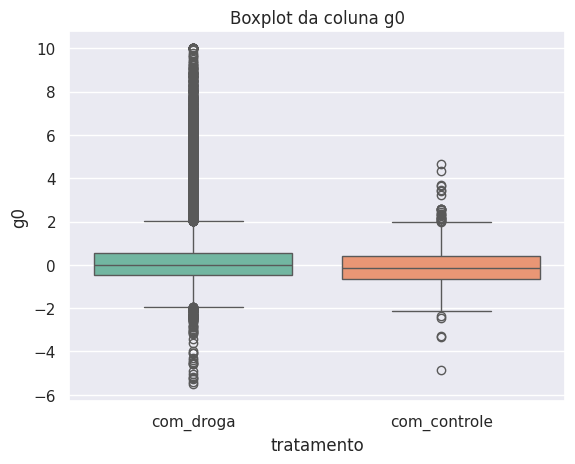

<Figure size 1000x800 with 0 Axes>

In [98]:
sns.set()

ax = sns.boxplot(data=df_dados, y="g0", x="tratamento", palette=sns.color_palette("Set2"))

plt.figure(figsize=(10, 8))

ax.set_title("Boxplot da coluna g0")

plt.show()

## Desafios



### 1.   Plotar os histogramas com o seaborn



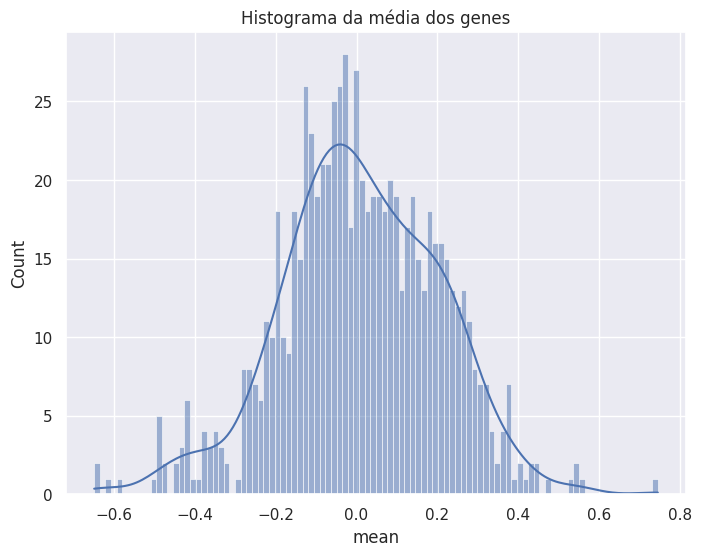

In [106]:
# Transpondo o DF
df_dados_g_transposto = df_dados.loc[:, "g0":"g771"].describe().T["mean"]

sns.set()

plt.figure(figsize=(8, 6))

ax = sns.histplot(data=df_dados_g_transposto, bins=100, kde=True)

ax.set_title("Histograma da média dos genes")

plt.show()



### 2.   Vendo se o Histograma do g0 bate com a média



A média de genes do g0 é 0.24836629293692786


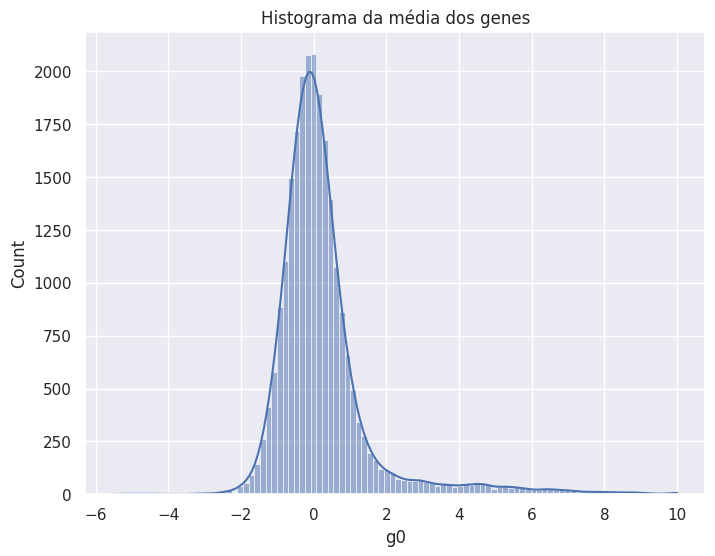

In [105]:
# Transpondo o DF
media_g0 = df_dados_g_transposto = df_dados.loc[:, "g0"].describe().T["mean"]
print(f"A média de genes do g0 é {media_g0}")

sns.set()

plt.figure(figsize=(8, 6))

ax = sns.histplot(data=df_dados["g0"], bins=100, kde=True)

ax.set_title("Histograma da média dos genes")

plt.show()